<a href="https://colab.research.google.com/github/mikosa01/TEAMNOLT/blob/main/group_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries and modules
from pathlib import Path
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Authenticating user and get access credentials to Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Downloading dataset zip file from Google Drive
downloaded = drive.CreateFile({"id": "1c06v0ViaOvssxGV14zbggB72NcvFR6AE"})
downloaded.GetContentFile("Group_Project_Data.zip")

In [4]:
# Extracting training and validation data from the zip file
zip_files = ["Train", "Valid"]
for zip_file in zip_files:
    with zipfile.ZipFile("Group_Project_Data.zip".format(zip_file), "r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

Train unzipped
Valid unzipped


In [5]:
# Defining the directories for training and validation data
train_dir = "/content/Group_Project_Data/Train"
val_dir = "/content/Group_Project_Data/Valid"

In [6]:
# Creating an image data generator with rescaling for training and validation data
train_datagen = ImageDataGenerator(rescale=1.0 / 255)  # rescale pixel values to [0, 1]
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [7]:
# generate batches of augmented data for training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    color_mode="grayscale",
    class_mode="binary",
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    color_mode="grayscale",
    class_mode="binary",
)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary'  
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary'
)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
# Creating the Sequential model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="valid",
            kernel_initializer="he_normal",
            input_shape=(64, 64, 1),
        ),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="same",
            kernel_regularizer=regularizers.l2(l=0.01),
        ),
        tf.keras.layers.MaxPooling2D(
            (2, 2),
        ),
        tf.keras.layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="same",
            kernel_regularizer=regularizers.l2(l=0.01),
        ),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="same",
            kernel_regularizer=regularizers.l2(l=0.01),
        ),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="same",
            kernel_regularizer=regularizers.l2(l=0.01),
        ),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [10]:
# Compiling the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
# Defining early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [12]:
# Fitting the model to the training data
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/10
188/188 - 10s - loss: 0.6518 - accuracy: 0.8160 - val_loss: 0.1720 - val_accuracy: 0.9890 - 10s/epoch - 54ms/step
Epoch 2/10
188/188 - 4s - loss: 0.1377 - accuracy: 0.9923 - val_loss: 0.1047 - val_accuracy: 0.9950 - 4s/epoch - 22ms/step
Epoch 3/10
188/188 - 4s - loss: 0.1205 - accuracy: 0.9907 - val_loss: 0.1104 - val_accuracy: 0.9900 - 4s/epoch - 19ms/step
Epoch 4/10
188/188 - 5s - loss: 0.0922 - accuracy: 0.9947 - val_loss: 0.0845 - val_accuracy: 0.9915 - 5s/epoch - 26ms/step
Epoch 5/10
188/188 - 4s - loss: 0.0722 - accuracy: 0.9962 - val_loss: 0.0554 - val_accuracy: 0.9995 - 4s/epoch - 19ms/step
Epoch 6/10
188/188 - 4s - loss: 0.0765 - accuracy: 0.9940 - val_loss: 0.1156 - val_accuracy: 0.9800 - 4s/epoch - 19ms/step
Epoch 7/10
188/188 - 5s - loss: 0.0658 - accuracy: 0.9965 - val_loss: 0.0524 - val_accuracy: 0.9980 - 5s/epoch - 24ms/step
Epoch 8/10
188/188 - 4s - loss: 0.0554 - accuracy: 0.9968 - val_loss: 0.0428 - val_accuracy: 0.9995 - 4s/epoch - 21ms/step
Epoch 9/10
188

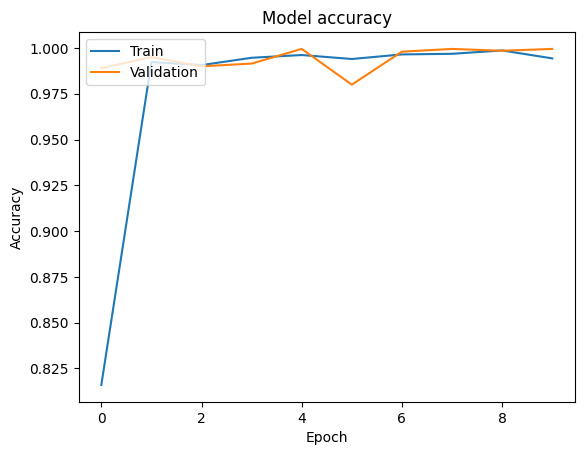

In [13]:
# Plotting the model's accuracy during training
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

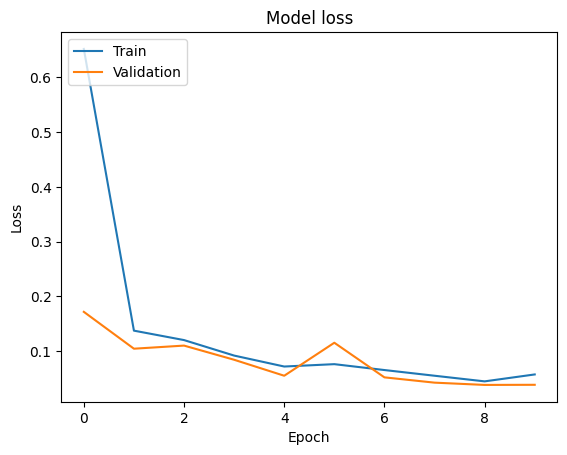

In [14]:
# Plotting the model's loss during training
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [15]:
# Saving the trained model
model.save("/content/Team_NOLT_Model_Trained")

In [16]:
# Testing saved model
loaded_model = tf.keras.models.load_model("/content/Team_NOLT_Model_Trained")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

In [17]:
# Zipping the model
!zip -r /content/Team_NOLT_Model_Trained.zip /content/Team_NOLT_Model_Trained

updating: content/Team_NOLT_Model_Trained/ (stored 0%)
updating: content/Team_NOLT_Model_Trained/assets/ (stored 0%)
updating: content/Team_NOLT_Model_Trained/saved_model.pb (deflated 89%)
updating: content/Team_NOLT_Model_Trained/variables/ (stored 0%)
updating: content/Team_NOLT_Model_Trained/variables/variables.data-00000-of-00001 (deflated 13%)
updating: content/Team_NOLT_Model_Trained/variables/variables.index (deflated 68%)
updating: content/Team_NOLT_Model_Trained/keras_metadata.pb (deflated 93%)
updating: content/Team_NOLT_Model_Trained/fingerprint.pb (stored 0%)


In [17]:
# Link to GitHub:
# https://github.com/mikosa01/TEAMNOLT
# Link to Colab: 
# https://colab.research.google.com/github/mikosa01/TEAMNOLT/blob/main/group_work.ipynb